<a href="https://colab.research.google.com/github/chankr96/Calculator/blob/main/Copy_of_PySpark_Data_Analysis_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=bb65ac1f52f5c6edff0e2faa68bfcbc23d0fefedbcca157d423d7fa043a75f17
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
spark

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext

from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql.functions import col,sum
import seaborn as sns
from pyspark.sql.types import IntegerType


In [ ]:
df = spark.read.csv('/content/drive/MyDrive/freelancer/PySpark/Loan_Default.csv', header=True)

In [ ]:
df.show(5)

+-----+----+----------+-----------------+-------------+---------+------------+-----------------+-----------+----------------------+-----------+----------------+--------------------+---------------+-----+-----------------+-------------+----------------+--------------+-----------------+--------------+----------+-----------+-------+-----------+------------+------------------------+-----+-------------------------+-----------+------+-------------+------+-----+
|   ID|year|loan_limit|           Gender|approv_in_adv|loan_type|loan_purpose|Credit_Worthiness|open_credit|business_or_commercial|loan_amount|rate_of_interest|Interest_rate_spread|Upfront_charges| term|Neg_ammortization|interest_only|lump_sum_payment|property_value|construction_type|occupancy_type|Secured_by|total_units| income|credit_type|Credit_Score|co-applicant_credit_type|  age|submission_of_application|        LTV|Region|Security_Type|Status|dtir1|
+-----+----+----------+-----------------+-------------+---------+------------+--

# Exploratory Data Analysis

In [ ]:
print("Loan Default count ",df.filter(df['Status']==1).select('Status').count())
print("Loan not default count ",df.filter(df['Status']==0).select('Status').count())

Loan Default count  36639
Loan not default count  112031


In [ ]:
# doing statistical analysis for Loan default class
df.filter(df['Status']==1).describe().show()

+-------+------------------+------+----------+-----------------+-------------+---------+------------+-----------------+-----------+----------------------+------------------+------------------+--------------------+-----------------+------------------+-----------------+-------------+----------------+------------------+-----------------+--------------+----------+-----------+-----------------+-----------+------------------+------------------------+-----+-------------------------+------------------+------+-------------+------+------------------+
|summary|                ID|  year|loan_limit|           Gender|approv_in_adv|loan_type|loan_purpose|Credit_Worthiness|open_credit|business_or_commercial|       loan_amount|  rate_of_interest|Interest_rate_spread|  Upfront_charges|              term|Neg_ammortization|interest_only|lump_sum_payment|    property_value|construction_type|occupancy_type|Secured_by|total_units|           income|credit_type|      Credit_Score|co-applicant_credit_type|  age

In [ ]:
# doing statistical analysis for Loan that does not default class
df.filter(df['Status']==0).describe().show()

+-------+-----------------+------+----------+-----------------+-------------+---------+------------+-----------------+-----------+----------------------+-----------------+-----------------+--------------------+------------------+-----------------+-----------------+-------------+----------------+-----------------+-----------------+--------------+----------+-----------+-----------------+-----------+------------------+------------------------+------+-------------------------+-----------------+------+-------------+------+------------------+
|summary|               ID|  year|loan_limit|           Gender|approv_in_adv|loan_type|loan_purpose|Credit_Worthiness|open_credit|business_or_commercial|      loan_amount| rate_of_interest|Interest_rate_spread|   Upfront_charges|             term|Neg_ammortization|interest_only|lump_sum_payment|   property_value|construction_type|occupancy_type|Secured_by|total_units|           income|credit_type|      Credit_Score|co-applicant_credit_type|   age|submis

In [ ]:
df.groupBy('Gender').agg({'income': 'Sum'}).sort('sum(income)',
                                                 ascending=False).show(5)

+-----------------+-----------+
|           Gender|sum(income)|
+-----------------+-----------+
|            Joint|  3.30282E8|
|             Male|2.7073092E8|
|Sex Not Available|2.2483518E8|
|           Female|1.4483982E8|
+-----------------+-----------+



In [ ]:
df.groupBy('loan_type').agg({'income': 'Sum','loan_amount':'Sum'}).sort('sum(income)',
                                                                        ascending=False).show(5)

+---------+-----------+----------------+
|loan_type|sum(income)|sum(loan_amount)|
+---------+-----------+----------------+
|    type1|  8.45064E8|   3.88847645E10|
|    type2| 7.723188E7|      5.334623E9|
|    type3| 4.839204E7|     5.0078875E9|
+---------+-----------+----------------+



In [ ]:
df.groupBy('loan_purpose').count().sort('count', ascending=False).show(5)

+------------+-----+
|loan_purpose|count|
+------------+-----+
|          p3|55934|
|          p4|54799|
|          p1|34529|
|          p2| 3274|
|        NULL|  134|
+------------+-----+



In [ ]:
df.groupBy('loan_limit').count().sort('count', ascending=False).show(5)

+----------+------+
|loan_limit| count|
+----------+------+
|        cf|135348|
|       ncf|  9978|
|      NULL|  3344|
+----------+------+



In [ ]:
df.groupBy('business_or_commercial').count().sort('count', ascending=False).show(5)

+----------------------+------+
|business_or_commercial| count|
+----------------------+------+
|                 nob/c|127908|
|                   b/c| 20762|
+----------------------+------+



In [ ]:
df.groupBy('business_or_commercial').agg({'loan_amount': 'Sum'}).sort('sum(loan_amount)', ascending=False).show(5)

+----------------------+----------------+
|business_or_commercial|sum(loan_amount)|
+----------------------+----------------+
|                 nob/c|    4.3892652E10|
|                   b/c|      5.334623E9|
+----------------------+----------------+



In [ ]:
df.groupBy('rate_of_interest').count().sort('count', ascending=False).show(5)

+----------------+-----+
|rate_of_interest|count|
+----------------+-----+
|            NULL|36439|
|            3.99|14455|
|           3.625| 8800|
|           3.875| 8592|
|            3.75| 8474|
+----------------+-----+
only showing top 5 rows



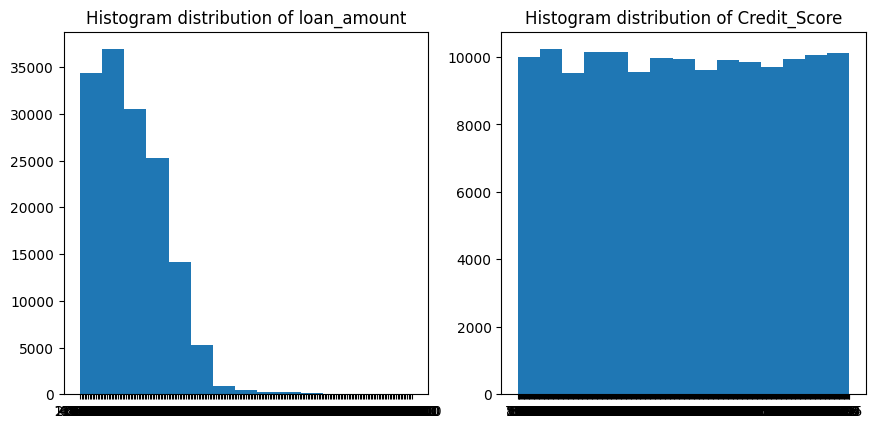

In [ ]:
df_pandas = df.toPandas()
numeric_columns = ['loan_amount', 'Credit_Score']

plt.figure(figsize=(16, 12))
for i, column in zip(range(1, 11), numeric_columns):
    plt.subplot(4, 3, i)
    plt.subplots_adjust(right=0.9, top=1.5)
    plt.hist(df_pandas[column], bins=15)
    plt.title('Histogram distribution of {}'.format(column))
plt.show()

In [ ]:
def pieplot(df, col, lim=10, yname=None):
    classes = df.groupBy(col).count().orderBy('count', ascending=False)
    pd_df = classes.limit(lim).toPandas()
    pd_df.plot(kind='pie', x=col, y='count', \
           labels=pd_df[col], legend=False,subplots= True)
    plt.title('Piechart analysis of {}'.format(col))
    plt.show()

<Figure size 1600x1200 with 0 Axes>

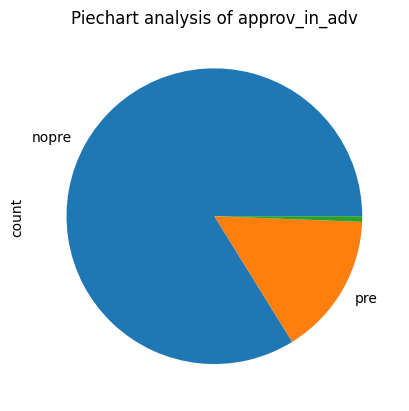

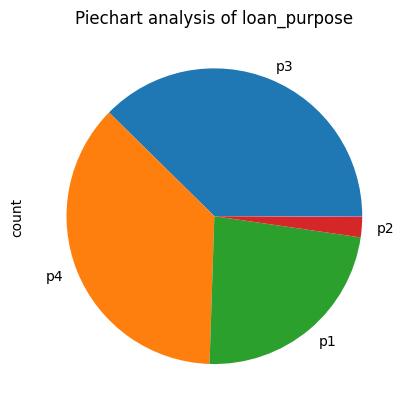

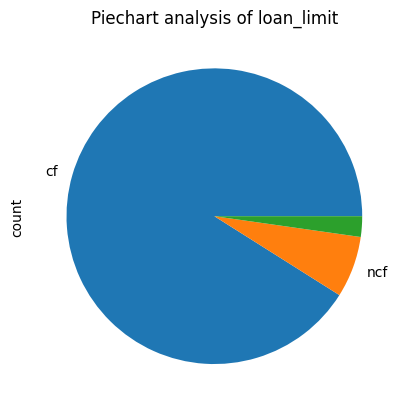

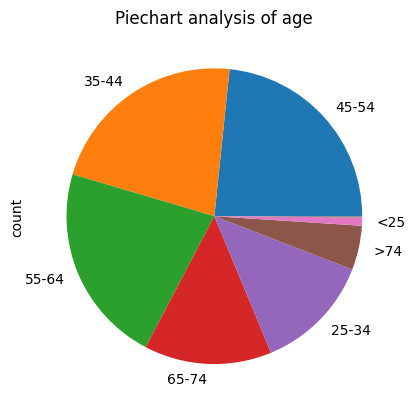

In [ ]:
columns_cat=['approv_in_adv', 'loan_purpose', 'loan_limit','age']
plt.figure(figsize=(16,12))

for column in columns_cat:
  pieplot(df, column)

In [ ]:
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         148670 non-null  object
 1   year                       148670 non-null  object
 2   loan_limit                 145326 non-null  object
 3   Gender                     148670 non-null  object
 4   approv_in_adv              147762 non-null  object
 5   loan_type                  148670 non-null  object
 6   loan_purpose               148536 non-null  object
 7   Credit_Worthiness          148670 non-null  object
 8   open_credit                148670 non-null  object
 9   business_or_commercial     148670 non-null  object
 10  loan_amount                148670 non-null  object
 11  rate_of_interest           112231 non-null  object
 12  Interest_rate_spread       112031 non-null  object
 13  Upfront_charges            109028 non-null  

In [ ]:
import pandas as pd
numeric_columns = ['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges',
                   'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'dtir1']

# Convert columns to numeric
for column in numeric_columns:
    df_pandas[column] = pd.to_numeric(df_pandas[column], errors='coerce')  # Use errors='coerce' to handle non-convertible values

# Check the data types after conversion
print(df_pandas.dtypes)

ID                            object
year                          object
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
a

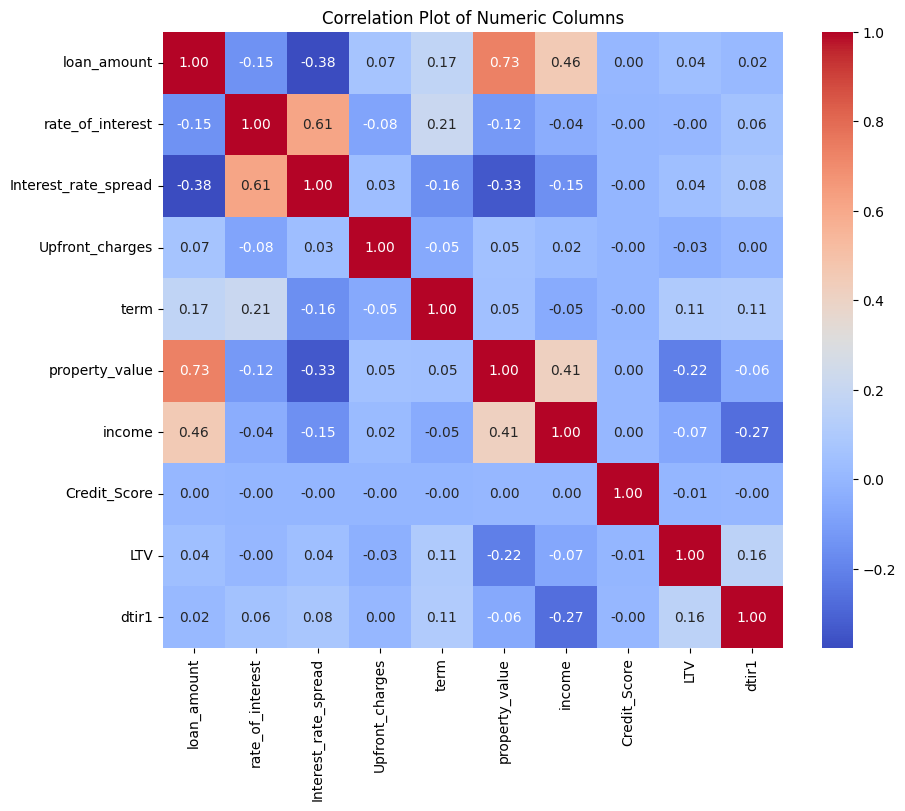

In [ ]:
for column in numeric_columns:
    df_pandas[column] = pd.to_numeric(df_pandas[column], errors='coerce')  # Use errors='coerce' to handle non-convertible values

# Calculate correlation matrix
correlation_matrix = df_pandas[numeric_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Plot of Numeric Columns')
plt.show()

# Data preprocessing and investigation

In [ ]:
df.count() # number of rows

148670

In [ ]:
df= df.dropDuplicates()
print(df.count())

148670


In [ ]:
df = df.drop("ID")

In [ ]:
df.printSchema()

root
 |-- year: string (nullable = true)
 |-- loan_limit: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- approv_in_adv: string (nullable = true)
 |-- loan_type: string (nullable = true)
 |-- loan_purpose: string (nullable = true)
 |-- Credit_Worthiness: string (nullable = true)
 |-- open_credit: string (nullable = true)
 |-- business_or_commercial: string (nullable = true)
 |-- loan_amount: string (nullable = true)
 |-- rate_of_interest: string (nullable = true)
 |-- Interest_rate_spread: string (nullable = true)
 |-- Upfront_charges: string (nullable = true)
 |-- term: string (nullable = true)
 |-- Neg_ammortization: string (nullable = true)
 |-- interest_only: string (nullable = true)
 |-- lump_sum_payment: string (nullable = true)
 |-- property_value: string (nullable = true)
 |-- construction_type: string (nullable = true)
 |-- occupancy_type: string (nullable = true)
 |-- Secured_by: string (nullable = true)
 |-- total_units: string (nullable = true)
 |-- inco

In [ ]:
from pyspark.sql.types import StringType, BooleanType, IntegerType, FloatType

numeric_cols=['year','loan_amount','Credit_Score',
              'LTV','Status','dtir1','rate_of_interest',
              'Interest_rate_spread','Upfront_charges',
              'term','property_value','income']

for column in numeric_cols:
    df = df.withColumn(column,F.col(column).cast(IntegerType()))

In [ ]:
df.printSchema()

root
 |-- year: integer (nullable = true)
 |-- loan_limit: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- approv_in_adv: string (nullable = true)
 |-- loan_type: string (nullable = true)
 |-- loan_purpose: string (nullable = true)
 |-- Credit_Worthiness: string (nullable = true)
 |-- open_credit: string (nullable = true)
 |-- business_or_commercial: string (nullable = true)
 |-- loan_amount: integer (nullable = true)
 |-- rate_of_interest: integer (nullable = true)
 |-- Interest_rate_spread: integer (nullable = true)
 |-- Upfront_charges: integer (nullable = true)
 |-- term: integer (nullable = true)
 |-- Neg_ammortization: string (nullable = true)
 |-- interest_only: string (nullable = true)
 |-- lump_sum_payment: string (nullable = true)
 |-- property_value: integer (nullable = true)
 |-- construction_type: string (nullable = true)
 |-- occupancy_type: string (nullable = true)
 |-- Secured_by: string (nullable = true)
 |-- total_units: string (nullable = true)
 |

In [ ]:
df.describe().show()

+-------+------+----------+-----------------+-------------+---------+------------+-----------------+-----------+----------------------+------------------+------------------+--------------------+------------------+------------------+-----------------+-------------+----------------+------------------+-----------------+--------------+----------+-----------+-----------------+-----------+------------------+------------------------+------+-------------------------+-----------------+------+-------------+-------------------+------------------+
|summary|  year|loan_limit|           Gender|approv_in_adv|loan_type|loan_purpose|Credit_Worthiness|open_credit|business_or_commercial|       loan_amount|  rate_of_interest|Interest_rate_spread|   Upfront_charges|              term|Neg_ammortization|interest_only|lump_sum_payment|    property_value|construction_type|occupancy_type|Secured_by|total_units|           income|credit_type|      Credit_Score|co-applicant_credit_type|   age|submission_of_applica

## Dealing with missing values

In [ ]:
# Check For missing values
df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in df.columns)).show()

+----+----------+------+-------------+---------+------------+-----------------+-----------+----------------------+-----------+----------------+--------------------+---------------+----+-----------------+-------------+----------------+--------------+-----------------+--------------+----------+-----------+------+-----------+------------+------------------------+---+-------------------------+-----+------+-------------+------+-----+
|year|loan_limit|Gender|approv_in_adv|loan_type|loan_purpose|Credit_Worthiness|open_credit|business_or_commercial|loan_amount|rate_of_interest|Interest_rate_spread|Upfront_charges|term|Neg_ammortization|interest_only|lump_sum_payment|property_value|construction_type|occupancy_type|Secured_by|total_units|income|credit_type|Credit_Score|co-applicant_credit_type|age|submission_of_application|  LTV|Region|Security_Type|Status|dtir1|
+----+----------+------+-------------+---------+------------+-----------------+-----------+----------------------+-----------+--------

In [ ]:
from pyspark.sql.functions import avg

#checking for missing values, computing the mean and filling the missing values


def compute_mean(data, cols_numeric, verbose=False):
    mean_value_of_column=[]
    for col in cols_numeric:
        mean_value = data.select(avg(data[col]))
        avg_col = mean_value.columns[0]
        res = mean_value.rdd.map(lambda row : row[avg_col]).collect()

        if (verbose==True): print(mean_value.columns[0], "\t", res[0])
        mean_value_of_column.append([col, res[0]])
    return mean_value_of_column

In [ ]:
from pyspark.sql.functions import when, lit

def filling_numerical_column(data, numeric_cols):
    column_mean = compute_mean(data, numeric_cols)
    for i, mean in column_mean:
        data = data.withColumn(i, when(data[i].isNull()==True,
        lit(mean)).otherwise(data[i]))
    return data

In [ ]:
num_cols=['LTV','income','property_value','Interest_rate_spread','rate_of_interest','dtir1','Upfront_charges']
df = filling_numerical_column(df, num_cols)

In [ ]:
df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in df.columns)).show()

In [ ]:
def filling_categorical_column(data, list_cat_columns, verbose=False):
    fil_cat_col=[]
    for col in list_cat_columns:
        data = data.filter(data[col].isNull()==False)
        unique_classes = data.select(col).distinct().rdd.map(lambda x: x[0]).collect()
        unique_values=[]
        for uc in unique_classes:
             unique_values.append([uc, data.filter(data[col]==uc).count()])
        sorted_unique_values= sorted(unique_values, key = lambda x: x[1], reverse =True)

        if (verbose==True): print(col, sorted_unique_values, " and mode is ", sorted_unique_values[0][0])
        fil_cat_col.append([col, sorted_unique_values[0][0]])
    return fil_cat_col

In [ ]:
list_cat_columns=['approv_in_adv', 'loan_purpose', 'loan_limit', 'term', 'Neg_ammortization','age']
filling_categorical_column(df, list_cat_columns, verbose=True)

In [ ]:
df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in df.columns)).show()

+----+----------+------+-------------+---------+------------+-----------------+-----------+----------------------+-----------+----------------+--------------------+---------------+----+-----------------+-------------+----------------+--------------+-----------------+--------------+----------+-----------+------+-----------+------------+------------------------+---+-------------------------+---+------+-------------+------+-----+
|year|loan_limit|Gender|approv_in_adv|loan_type|loan_purpose|Credit_Worthiness|open_credit|business_or_commercial|loan_amount|rate_of_interest|Interest_rate_spread|Upfront_charges|term|Neg_ammortization|interest_only|lump_sum_payment|property_value|construction_type|occupancy_type|Secured_by|total_units|income|credit_type|Credit_Score|co-applicant_credit_type|age|submission_of_application|LTV|Region|Security_Type|Status|dtir1|
+----+----------+------+-------------+---------+------------+-----------------+-----------+----------------------+-----------+------------

# Dealing with outliers

In [ ]:
class Outlier():

    def __init__(self, df):
        self.df = df


    def _calculate_bounds(self):
        bounds = {
            c: dict(
                zip(["q1", "q3"], self.df.approxQuantile(c, [0.25, 0.75], 0))
            )
            for c, d in zip(self.df.columns, self.df.dtypes) if d[1] in ["bigint", "double"]
        }

        for c in bounds:
            iqr = bounds[c]['q3'] - bounds[c]['q1']
            bounds[c]['min'] = bounds[c]['q1'] - (iqr * 1.5)
            bounds[c]['max'] = bounds[c]['q3'] + (iqr * 1.5)

        return bounds


    def _flag_outliers_df(self):
        bounds = self._calculate_bounds()

        outliers_col = [
            f.when(
                ~f.col(c).between(bounds[c]['min'], bounds[c]['max']),
                f.col(c)
            ).alias(c + '_outlier')
            for c in bounds]

        return self.df.select(*outliers_col)


    def show_outliers(self):

        outlier_df = self._flag_outliers_df()

        for outlier in outlier_df.columns:
            outlier_df.select(outlier).filter(f.col(outlier).isNotNull()).show()

In [ ]:
Outlier(df).show_outliers()

+------------------------+
|rate_of_interest_outlier|
+------------------------+
|                     6.0|
|                     6.0|
|                     6.0|
|                     6.0|
|                     6.0|
|                     6.0|
|                     8.0|
|                     6.0|
|                     6.0|
|                     6.0|
|                     6.0|
|                     6.0|
|                     6.0|
|                     6.0|
|                     6.0|
|                     6.0|
|                     6.0|
|                     6.0|
|                     6.0|
|                     6.0|
+------------------------+
only showing top 20 rows

+----------------------------+
|Interest_rate_spread_outlier|
+----------------------------+
|                         1.0|
|                         1.0|
|                         1.0|
|                         1.0|
|                         1.0|
|                         1.0|
|                         1.0|
|               

In [ ]:
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler

categoricalColumns = ['job', 'marital', 'education', 'default',
                      'housing', 'loan', 'contact', 'poutcome']
stages = []

for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]

label_stringIdx = StringIndexer(inputCol = 'deposit', outputCol = 'label')
stages += [label_stringIdx]

numericCols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [ ]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['label', 'features'] + cols
df = df.select(selectedCols)
df.printSchema()

In [ ]:
train, test = df.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))